# Ill-Conditioning and the SVD

In [1]:
using LinearAlgebra, Distributions, Random, Plots

We can make a simple ill-conditioned system by making two columns close to each other.

In [158]:
delta = 0.0000001
d = [1-delta 1; 1+delta 1]
pinv(d,atol=0.1)
c = [1 3 4; 4 5 4]
sss = svd(c'*c)
ivs = sss.V*diagm([1/sss.S[1],1/sss.S[2], 1/sss.S[3]])*sss.U'
ivs2 = sss.V*diagm([1/sss.S[1],1/sss.S[2], 0])*(sss.U)'
ivs2*(c')
pinv(c)


3×3 Array{Float64,2}:
  0.176384    0.0311435   -0.148193 
  0.0311435   0.00970492  -0.0189556
 -0.148193   -0.0189556    0.136868 

In [134]:
inv((d'*d))*d'

2×2 Array{Float64,2}:
 -4.89522e6   4.89522e6
  4.89522e6  -4.89522e6

In [131]:
ss = svd(d)
# ss.V *diagm([1/ss.S[1],1/ss.S[2]])*ss.U'
# ss.U * diagm([ss.S[1],ss.S[2]])*ss.V'

SVD{Float64,Float64,Array{Float64,2}}
U factor:
2×2 Array{Float64,2}:
 -0.707107  -0.707107
 -0.707107   0.707107
singular values:
2-element Array{Float64,1}:
 2.0000000000000027  
 9.999999996034342e-8
Vt factor:
2×2 Array{Float64,2}:
 -0.707107  -0.707107
  0.707107  -0.707107

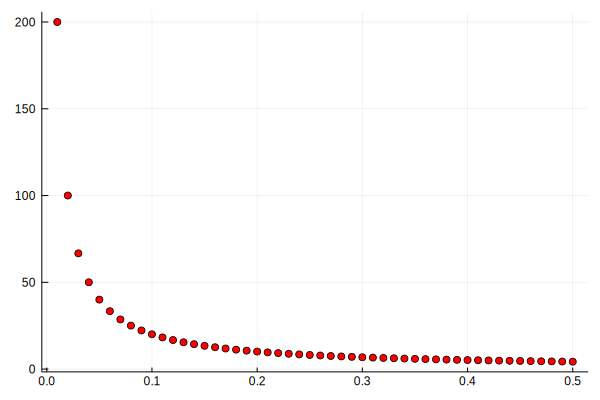

In [10]:
plt = plot(legend=false)
for i in 0.5:-0.01:0.01
    delta = i
    A = [1-delta 1; 1+delta 1]
    scatter!([i],[cond(A)],color=:red)
end
plt

## Characterizing Ill-Conditioned Systems

By examining the Singular Value Decomposition (SVD) of a matrix, we can investigate how (and why!) it is ill-conditioned.  In Julia, we can calculate the SVD by using the svd command.

In [11]:
s = svd(A)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
2×2 Array{Float64,2}:
 -0.703562  -0.710634
 -0.710634   0.703562
singular values:
2-element Array{Float64,1}:
 2.000025000468744   
 0.009999874999218818
Vt factor:
2×2 Array{Float64,2}:
 -0.707124  -0.707089
  0.707089  -0.707124

In [12]:
s.S[1]/s.S[2]

200.005000125

In [13]:
cond(A)

200.0050001250001

#### A Bigger Example

In [14]:
B = rand(10,10)

10×10 Array{Float64,2}:
 0.804536   0.208101  0.154541   0.803578  …  0.164179   0.428766   0.237082
 0.302044   0.118201  0.0343757  0.877946     0.358578   0.0122173  0.254724
 0.308973   0.162413  0.448174   0.569063     0.781437   0.902716   0.199064
 0.0438399  0.775579  0.879983   0.389586     0.0552659  0.105979   0.14842 
 0.124689   0.143627  0.853868   0.797575     0.643106   0.578022   0.907115
 0.676639   0.290653  0.965007   0.688505  …  0.570691   0.723518   0.950292
 0.285371   0.277802  0.0870202  0.248763     0.753672   0.544699   0.386044
 0.590029   0.140571  0.831561   0.917142     0.46036    0.849933   0.893975
 0.0406252  0.879377  0.620819   0.559346     0.0405626  0.393925   0.745689
 0.382121   0.439351  0.402673   0.224692     0.171141   0.65746    0.287472

In [15]:
cond(B)

354.0124949149518

In [16]:
s2 = svd(B)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
10×10 Array{Float64,2}:
 -0.302741   0.522916   -0.215808    …  -0.240419   -0.118283   -0.520283  
 -0.269007   0.467326   -0.00284325     -0.166969    0.205385    0.505921  
 -0.310694  -0.0655995  -0.233202       -0.102372    0.152498   -0.148169  
 -0.290543   0.169121    0.722362        0.0747465  -0.0697609   0.0132945 
 -0.354871  -0.390842   -0.0453105      -0.405856   -0.436406   -0.212098  
 -0.390483  -0.319771   -0.16912     …  -0.0310578   0.722711    0.00126833
 -0.315857   0.348469   -0.0887065       0.358073   -0.046389   -0.0439548 
 -0.395094  -0.202477   -0.266403        0.618433   -0.366939    0.237008  
 -0.282472  -0.229698    0.517331        0.0732576   0.114521   -0.19226   
 -0.202414  -0.0711376  -0.0102049      -0.465325   -0.230285    0.55782   
singular values:
10-element Array{Float64,1}:
 5.036451800901534   
 1.5614317886316038  
 1.286658211429458   
 1.079342592828617   
 0.8305749577931608  
 0.650382839

In [17]:
s2.S[1]/s2.S[end]

354.0124949149518

## Solving an Ill-Conditioned System

We want to see the effect of solving an ill-conditioned system, one where we can control the level of ill-conditioning.  We can do this using a very similiar setup as before, by making two columns essentially very close to one another.

In [58]:
N = 1_000
delta = 0.0001 # This controls how close they are, the smaller delta, the larger the condition

A = [ones(N) ones(N) + delta*(rand(N) .- 0.5)]

A

1000×2 Array{Float64,2}:
 1.0  0.999972
 1.0  0.999978
 1.0  1.00003 
 1.0  0.999968
 1.0  0.999982
 1.0  1.00004 
 1.0  1.0     
 1.0  1.00001 
 1.0  0.999998
 1.0  0.999974
 1.0  0.999964
 1.0  1.00004 
 1.0  0.99998 
 ⋮            
 1.0  1.00002 
 1.0  1.00001 
 1.0  1.00001 
 1.0  0.999992
 1.0  1.00004 
 1.0  0.999967
 1.0  0.999967
 1.0  1.00002 
 1.0  0.999959
 1.0  0.999955
 1.0  1.00001 
 1.0  1.00004 

In [59]:
beta = [1; 2] # Assume we know the beta values exactly
y = A * beta

1000-element Array{Float64,1}:
 2.9999435481603154
 2.9999565099607888
 3.0000663658701083
 2.999935768570081 
 2.999963022614601 
 3.0000846246570654
 3.000007486808291 
 3.000010235248761 
 2.999996247809399 
 2.9999478754074143
 2.9999285029841145
 3.000076586269858 
 2.99995999938675  
 ⋮                 
 3.0000409369429755
 3.000014625890561 
 3.0000187496496253
 2.999984930490333 
 3.0000752447711494
 2.9999349383259672
 2.99993326004181  
 3.0000315257995327
 2.99991768769471  
 2.999910827877849 
 3.000022496387    
 3.0000703469044   

Here y has NO noise added to it.  It is numerically as good as it could be.

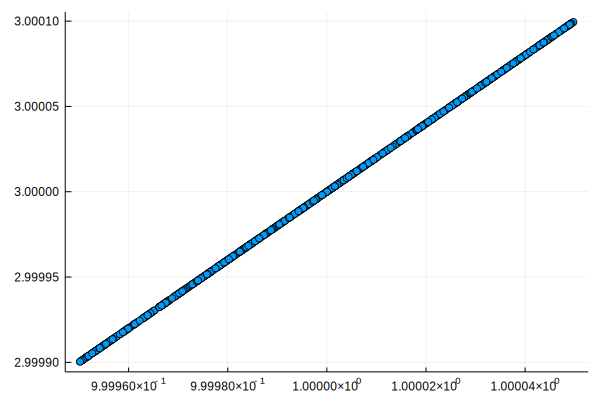

In [60]:
scatter(A[:,2],y,label="",linewidth=4)

In [61]:
cond(A)

69853.15485990893

In [62]:
cond(A' * A)

4.879462386345639e9

In [63]:
svd(A)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
1000×2 Array{Float64,2}:
 -0.0316223  -0.031666  
 -0.0316224  -0.024508  
 -0.0316233   0.0361586 
 -0.0316223  -0.0359622 
 -0.0316225  -0.0209115 
 -0.0316234   0.0462417 
 -0.0316228   0.00364334
 -0.0316229   0.00516113
 -0.0316227  -0.00256325
 -0.0316224  -0.0292763 
 -0.0316222  -0.0399745 
 -0.0316234   0.0418027 
 -0.0316225  -0.022581  
  ⋮                     
 -0.0316231   0.0221158 
 -0.0316229   0.00758581
 -0.0316229   0.0098631 
 -0.0316227  -0.0088131 
 -0.0316234   0.0410618 
 -0.0316223  -0.0364206 
 -0.0316222  -0.0373475 
 -0.031623    0.0169186 
 -0.0316221  -0.0459471 
 -0.0316221  -0.0497353 
 -0.0316229   0.0119322 
 -0.0316233   0.038357  
singular values:
2-element Array{Float64,1}:
 44.72136948910282     
  0.0006402197521184533
Vt factor:
2×2 Array{Float64,2}:
 -0.707107  -0.707107
 -0.707107   0.707107

In [64]:
svd(A' * A)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
2×2 Array{Float64,2}:
 -0.707107  -0.707107
 -0.707107   0.707107
singular values:
2-element Array{Float64,1}:
 2000.0008889808562     
    4.098814030368436e-7
Vt factor:
2×2 Array{Float64,2}:
 -0.707107  -0.707107
 -0.707107   0.707107

The Condition number for this system is initially high but not impossible.  We should still be able to use the Normal equations to solve for our known betas.

In [65]:
est_beta = inv(A' * A) * A' * y

2-element Array{Float64,1}:
 0.9999997463287684
 1.9999999221211908

In [66]:
# Relative error
abs.(beta-est_beta)./beta * 100

2-element Array{Float64,1}:
 2.5367123157593596e-5
 3.893940458965517e-6 

Looks good!  

How about if we add a tiny bit of noise to our y values?  This essentially simulates the effect of getting *slightly* different data (remember, in inverse problems, the y is coming from data).  The hope would be that slightly different data should give the same results!

In [67]:
z = y + rand(Normal(0,0.1),N);

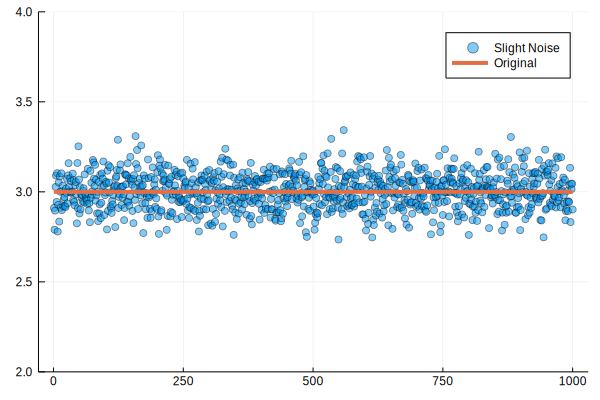

In [68]:
scatter(z,label="Slight Noise",linewidth=4,alpha=0.5)
plot!(y,label="Original",linewidth=4,ylimits=(2.,4.))

Again, because our ill-conditioning isn't too bad, we should be able to use the Normal equations still.

In [69]:
est_beta2 = inv(A' * A) * A' * z

2-element Array{Float64,1}:
 -132.01672145165884
  135.02020921627013

In [70]:
# Relative error
abs.(beta-est_beta2)./beta * 100

2-element Array{Float64,1}:
 13301.672145165883
  6651.010460813506

In [90]:
s = svd(A)
cond(s.U* diagm([s.S[1],0])*s.V')
c = [1 0; 0 0]

Inf

The Normal equations are essentially creating a pseudo-inverse, but using all the information contained in A.

In [32]:
inv(A' * A) * A'

2×1000 Array{Float64,2}:
 -56.6352  -6.05589  -46.5578  -5.98865  …  -18.1418  -53.5163  -22.4574
  56.6362   6.05689   46.5588   5.98965      18.1428   53.5173   22.4584

Julia has a single function to calculate this pseudo-inverse, 'pinv', which does the same exact thing:

In [93]:
cond(pinv(A)),cond(A)

(69853.1548600923, 69853.15485990893)

However, it allows for additional options, which will filter out any singular values less than a certain tolerance.  Let us remove all singular values less than 0.001 from our pseudo-inverse.

In [94]:
pinv(A; atol=0.001)
# pinv(A; atol=10)

1.202146686808357e15

This produces a VERY different inverse, but still with the correct dimensions.  This is just setting the singular values to zero and recombinning to form an inverse, as we can show directly:

In [56]:
s.V * diagm([1/s.S[1],0]) * s.U'
# diagm([1/s.S[1],0])
# cond(s.V * diagm([1/s.S[1],0]) * s.U')


2×1000 Array{Float64,2}:
 0.000500012  0.000500001  0.00050001  …  0.000500011  0.000500005
 0.000500012  0.000500001  0.00050001     0.000500011  0.000500005

Using this restricted pseudo-inverse gets us significantly more stable estimates.

In [36]:
pinv(A; atol=0.001)*y

2-element Array{Float64,1}:
 1.4999998947441435
 1.5000002105116605

In [37]:
pinv(A; atol=0.001)*z

2-element Array{Float64,1}:
 1.4998097554363525
 1.4998100711638445

In [38]:
B = [0 0]

1×2 Array{Int64,2}:
 0  0

In [39]:
svd(B)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
1×1 Array{Float64,2}:
 1.0
singular values:
1-element Array{Float64,1}:
 0.0
Vt factor:
1×2 Array{Float64,2}:
 1.0  0.0